Привет, Евгений! Меня зовут Ольга и я буду проверять твою работу. Предлагаю продолжить общение на «ты».

Мои комментарии выглядят так:
        
<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Таким цветом отмечены правильные решения.

</div>

<div class="alert alert-block alert-warning">
<b>Комментарий от ревьюера</b>

Таким цветом отмечены дополнения как сделать работу еще лучше.

</div>

<div class="alert alert-block alert-danger">
<b>Комментарий от ревьюера</b>

Таким цветом отмечены неудачные решения

</div>

Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта.

Ты можешь оставлять свои комментарии под моими, отметь их каким-нибудь цветом или просто выдели отдельную ячейку.
Например, так:

<div class="alert alert-block alert-info">
<b>Комментарий от студента</b> <a class="tocSkip"></a>
    
Текст комментария
</div>

<div class="alert alert-block alert-warning">
<b>Общий комментарий от ревьюера</b>

Евгений, очень крутая работа! Отличное оформление, просто радость для глаз! Ты пишешь шикарные выводы, они очень ёмкие, продолжай в том же духе!
    
Практически все мои комментарии зеленые. Только в конце пропущена одна вещь, я думаю ты легко с ней разберешься.
    
Еще можно добавить немного твоих прекрасных выводов, они буду кстати. :)
    
Жду дополнения! :)

</div>


<div class="alert alert-block alert-success">
<b>Общий комментарий от ревьюера</b>

Привет, Евгений! Поздравляю со сдачей этого сложного проекта!
       
Отличная работа с дополнительными показателями для каждого источника!
        
Работа получилась шикарной, ты молодец! 
    
Удачи в дальнейшем обучении! :)
</div>


# Анализ бизнес показателей в Яндекс.Афише

Маректиногвуму отделу Яндекс.Афиши необходимо помочь снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.<br><br>
Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
* лог сервера с данными о посещениях сайта Яндекс.Афиши,
* выгрузка всех заказов за этот период,
* статистика рекламных расходов.

<b>Необходимо изучить</b>:
* как клиенты пользуются сервисом,
* когда делают первые покупки на сайте,
* сколько денег приносит компании каждый клиент,
* когда расходы на привлечение клиента окупаются.

Выручка измеряется в условных единицах — у.е.

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Отличное начало! Есть вступление, классное оглавление и импорт библиотек в самом начале. Поехали!
</div>

# Шаг 1. Загрузка и подготовка данных к анализу

In [1]:
# Блок с константами

MARGIN_RATE = 1 # маржа 100%

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random


In [3]:
visits = pd.read_csv('/datasets/visits_log.csv')
visits.head(3)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
# проверка на дубликаты
visits.duplicated().sum()

0

<b>Структура orders_log.csv</b>
* Uid — уникальный идентификатор пользователя,
* Buy Ts — дата и время заказа,
* Revenue — сумма заказа.

In [6]:
orders = pd.read_csv('/datasets/orders_log.csv')
orders.head(3)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


<b>Структура coscts.csv</b>
* source_id — идентификатор рекламного источника,
* dt — дата проведения рекламной кампании,
* costs — расходы на эту кампанию.

In [8]:
costs = pd.read_csv('/datasets/costs.csv')
costs.head(3)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53


In [9]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


### Функция для переименования столбцов

В названиях столбцов есть заглавные буквы и пропуски. Избавляемся от них.

In [10]:
def columns(table):
    good_columns = []
    for column in table.columns:
        column = column.lower()
        column = '_'.join(column.split())
        good_columns.append(column)       
    table.columns = good_columns

In [11]:
columns(visits)
columns(orders)

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Хороший и краткий раздел получился. Можно еще добавить маленький вывод о том, что мы не нашли дубликатов, нет пропущенных значений, а колонки с датой мы будем переводить в формат даты. :)

</div>

# Шаг 2

## 2.1 Продуктовые метрики

### 2.1.1 Рассчитываем DAU, WAU и MAU

In [12]:
# приводим столбец к формату даты
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format='%Y-%m-%d %H:%M:%S')
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format='%Y-%m-%d %H:%M:%S')

In [13]:
# выделяем из даты год, месяц, неделю и день
visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Отлично!

</div>

#### Расчитаем число ежедневных, еженедельных и ежемесячных пользователей сервиса

In [14]:
# группируем по дням, считаем число уникальных пользователей в день
daily_visits = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
print('DAU: в среднем каждый день сервисом пользуется {} уникальных пользователей'.format(int(daily_visits)))

DAU: в среднем каждый день сервисом пользуется 907 уникальных пользователей


In [15]:
# группируем по годам и неделям, считаем число уникальных пользователей в неделю
weekly_visits = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
print('WAU: в среднем каждую неделю сервисом пользуется {} уникальных пользователей'.format(int(weekly_visits)))

WAU: в среднем каждую неделю сервисом пользуется 5716 уникальных пользователей


In [16]:
# группируем по годам и месяцам, считаем число уникальных пользователей в месяц
monthly_visits = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
print('MAU: в среднем каждый месяц сервисом пользуется {} уникальных пользователей'.format(int(monthly_visits)))

MAU: в среднем каждый месяц сервисом пользуется 23228 уникальных пользователей


#### Расчитаем недельное и месячное значение Sticky Factor

Sticky Factor (также Stickiness Factor) — рекламная метрика, применяемая в интернет-маркетинге, которая показывает степень лояльности и вовлеченности аудитории. Представляет собой отношение среднестатистического числа уникальных пользователей в течение дня к числу уникальных пользователей в течение недели или месяца.

In [17]:
# недельная вовлеченность
stickness_wau = daily_visits / weekly_visits
print('Недельная вовлеченность {:.0%}'.format(stickness_wau[0]))

Недельная вовлеченность 16%


In [18]:
# месячная вовлеченность
stickness_mau = daily_visits / monthly_visits
print('Месячная вовлеченность {:.0%}'.format(stickness_mau[0]))

Месячная вовлеченность 4%


<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Очень хорошо получилось!

</div>


#### Графики изменения DAU, WAU и MAU в зависимости от времени

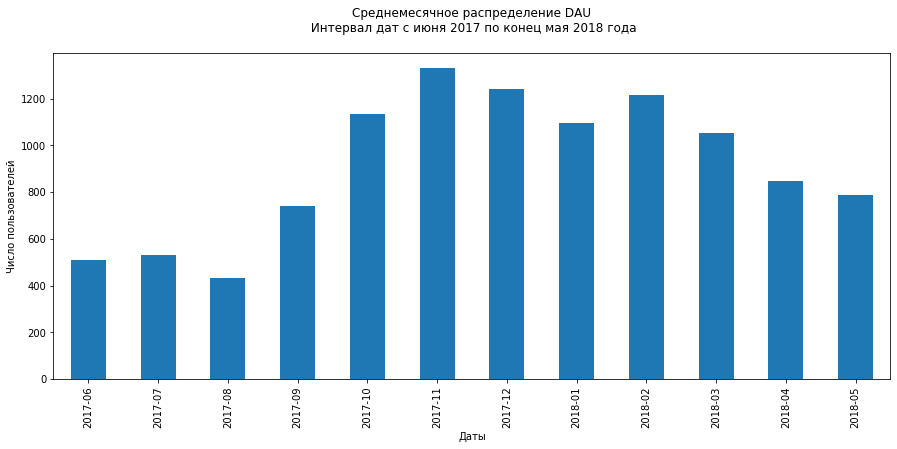

In [19]:
stick_dau = visits.groupby('session_date').agg({'uid': 'nunique'}).reset_index()
stick_dau['month_year'] = stick_dau['session_date'].astype('str')

def cut_func(x):
   return x[0:7]

stick_dau['month_year'] = stick_dau['month_year'].apply(cut_func)
stick_dau.groupby('month_year')['uid'].mean().plot(kind='bar', figsize=(15, 6))


plt.title('Среднемесячное распределение DAU'+ "\n Интервал дат с июня 2017 по конец мая 2018 года" + "\n")
plt.xlabel('Даты')
plt.ylabel('Число пользователей')
plt.show()

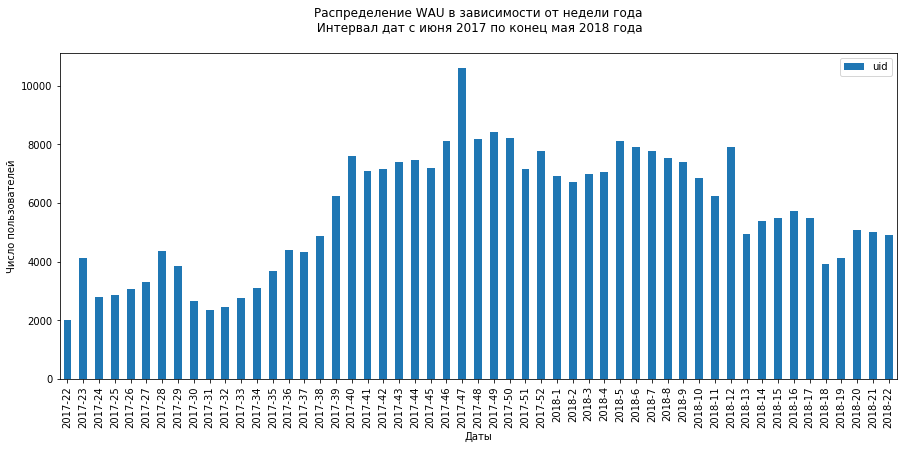

In [20]:
sticy_wau = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).reset_index()
sticy_wau['week_year'] = sticy_wau['session_year'].astype('str') + '-' + sticy_wau['session_week'].astype('str')
sticy_wau.plot(kind='bar', x='week_year', y='uid', figsize=(15, 6))

plt.title('Распределение WAU в зависимости от недели года'+ "\n Интервал дат с июня 2017 по конец мая 2018 года" + "\n")
plt.xlabel('Даты')
plt.ylabel('Число пользователей')
plt.show()

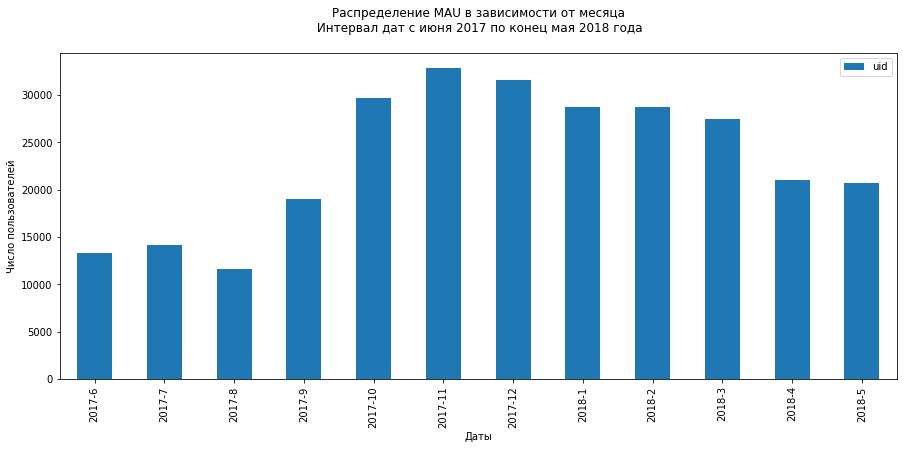

In [21]:
sticy_mau = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).reset_index()
sticy_mau['month_year'] = sticy_mau['session_year'].astype('str') + '-' + sticy_mau['session_month'].astype('str')
sticy_mau.plot(kind='bar', x='month_year', y='uid', figsize=(15, 6))

plt.title('Распределение MAU в зависимости от месяца'+ "\n Интервал дат с июня 2017 по конец мая 2018 года" + "\n")
plt.xlabel('Даты')
plt.ylabel('Число пользователей')
plt.show()

#### Предварительный вывод

Недельная вовлеченность аудитории равна 16%. Но так как данных у нас достаточно много, то лучше использовать месячный показатель Sticky Factor. Он равен 4%. Это говорит о том, что у сервиса слабая вовлеченность аудитории. Что может влиять на монетизацию и доход. Так как чем стабильнее и заинтересованнее пользовательская база, тем быстрее формируется и растет аудитория продукта. А чем она больше, тем больше платежей совершают пользователи. В нашем случае надо увеличивать месячный показатель вовлеченности.

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Очень крутые графики! Всё подписано, сразу понятно, что происходит. Вывод прекрасен, очень хорошо, что ты высказываешь предположения.

</div>

### Рассчитаем сколько раз пользователи заходят на сайт

In [22]:
daily_stat = visits.groupby('session_date').agg({'uid': ['count', 'nunique']})
sessions_a_day = daily_stat['uid']['count']
print('Среднее количество сессий в день {}'.format(int(sessions_a_day.mean())))
sessions_on_one_user = sessions_a_day / daily_stat['uid']['nunique']
print('Один пользователь в среднем совершает {:.2f} сессий'.format(sessions_on_one_user.mean()))

Среднее количество сессий в день 987
Один пользователь в среднем совершает 1.08 сессий


 #### Построим график изменения количества сессий во времени

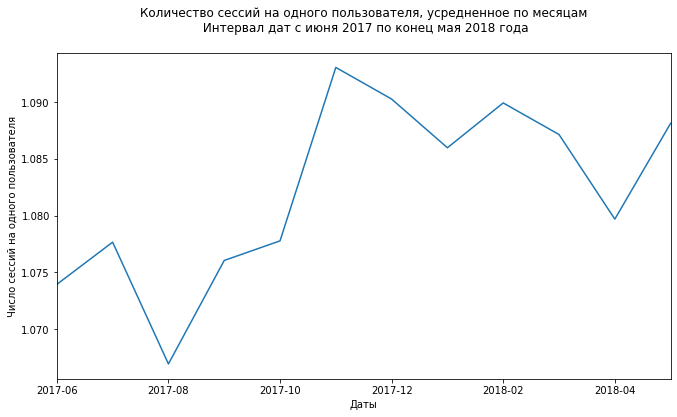

In [23]:
sessions_on_one_user.name = 'n_sessions'
sessions_on_one_user = pd.DataFrame(sessions_on_one_user).reset_index()
sessions_on_one_user['month_year'] = sessions_on_one_user['session_date'].astype('str')

def cut_func(x):
   return x[0:7]

sessions_on_one_user['month_year'] = sessions_on_one_user['month_year'].apply(cut_func)
sessions_on_one_user.groupby('month_year')['n_sessions'].mean().plot(figsize=(11, 6))

plt.title('Количество сессий на одного пользователя, усредненное по месяцам'+ "\n Интервал дат с июня 2017 по конец мая 2018 года" + "\n")
plt.xlabel('Даты')
plt.ylabel('Число сессий на одного пользователя')
plt.show()



#### Предварительный вывод

В среднем ежедневное количество сессий равно 987. Один пользльователь в среднем совершает 1.09 сессий. 

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Маловато на одного пользователя,но что есть. :)

</div>

### Расчитаем сколько времени пользователи проводят на сайте

#### Продолжительность типичной сессии

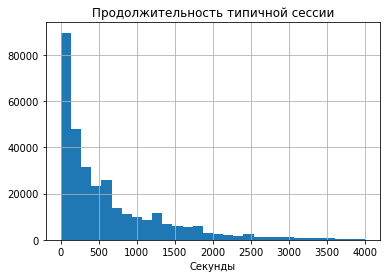

In [24]:
duration = visits.copy()
duration.head()
duration['session_duration_sec'] = (duration['end_ts'] - duration['start_ts']).dt.seconds
# в выборке довльно много (около 35 000) нулевых сессий. Исключаем их из расчета
duration = duration.query('session_duration_sec != 0')
# строим распределение временных сессий
duration['session_duration_sec'].hist(range=(0,4000), bins=30)

plt.title('Продолжительность типичной сессии')
plt.xlabel('Секунды')
plt.show()

In [25]:
duration['session_duration_sec'].describe()

count    323606.000000
mean        714.684623
std        1047.052806
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

In [26]:
time = duration['session_duration_sec'].mode()
print(time)

0    60
dtype: int64


Так как распределение длительности типичной пользовательской сессии не похоже на нормальное, то мы не можем использовать среднее (714 сек.) или медиану (360 сек.). В нашем случае лучше выбрать моду, значение, которое встречается чаще всего в выборке. Получается, что в нашем случае типичная польовательская сессия равна 60 секундам.

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Всего минута,не очень много. Можно добавить предположение,почему так мало. И предположить,что можно сделать за среднее и медианное время.

</div>

### Retention Rate

Определим событие и период — на их основе сформируем когорту. Возьмём дату, когда пользователь впервые проявил активность

In [27]:
first_activity_date = visits.groupby(['uid'])['start_ts'].min()
# переименовываем, чтобы при объединении таблиц не возникало путаницы в названии столбцов
first_activity_date.name = 'first_activity_date' 

Добавляем в таблицу Visits столбец с датой первого действия пользователя 

In [28]:
visits = visits.join(first_activity_date, on='uid')

Выделим из столбцов first_activity_date и start_ts месяцы

In [29]:
visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')
visits['start_ts_month'] = visits['start_ts'].astype('datetime64[M]')

Для каждой строки датафрейма рассчитаем Lifetime пользователя.  Период Lifetime выбираем месяц, потому что данных очень много и если взять меньший период, например, неделю. То получится огромная таблица в которой ничего не будет понятно.

In [30]:
visits['lifetime_cohort'] = (visits['start_ts_month'] - visits['first_activity_month']) / np.timedelta64(1, 'M')
visits['lifetime_cohort'] = visits['lifetime_cohort'].round().astype('int')


Посчитаем для каждой когорты количество активных пользователей на определенный месяц жизни когорты

In [31]:
cohorts = visits.groupby(['first_activity_month', 'lifetime_cohort']).agg({'uid': 'nunique'}).reset_index()

Определяем исходное количество пользователей в когорте

In [32]:
initial_users_count = cohorts.loc[cohorts['lifetime_cohort'] == 0][['first_activity_month', 'uid']]


In [33]:
# во избежание путаницы переименовываем столбец
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 

Добавляем в таблицу Cohorts исходное число пользователей по когортам

In [34]:
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')

In [35]:
# Для лучшей читабельности обрезаем дату 
cohorts['first_activity_month'] = cohorts['first_activity_month'].dt.strftime('%Y-%m')

Рассчитаем Retention Rate: делим число активных пользователей в каждый месяц на исходное число пользователей в когорте

In [36]:
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

#### Построим сводную таблицу и создадим тепловую карту:

In [37]:
retention_pivot = cohorts.pivot_table(
    index='first_activity_month',
    columns='lifetime_cohort',
    values='retention',
    aggfunc='sum',
) 

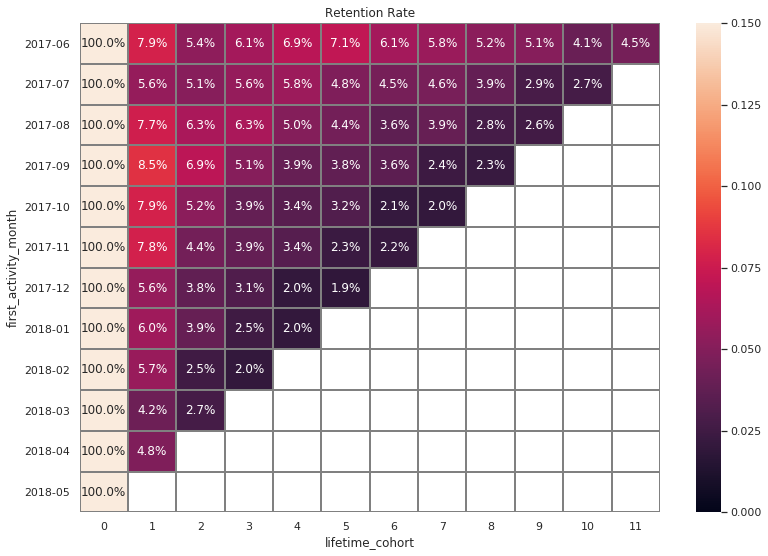

In [38]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Retention Rate')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin=0, vmax=0.15)

plt.show()

In [39]:
mean_retention = retention_pivot.reset_index()[1].mean()
print('Средний Retention Rate на второй месяц жизни когорт равен {:.2%}'.format(mean_retention))

Средний Retention Rate на второй месяц жизни когорт равен 6.52%


#### Предварительный вывод

* Более 90% пользователей пользуются сервисом всего один раз
* В первой когорте на 4 и 5 месяце lifetime наблюдается небольшой рост, но затем опять спад
* После 0 месяца lifetime по всем когортам наблюдается плавный спад
* Средний Retention Rate на второй месяц жизни когорт равен 6.52%

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Очень хорошо получилось! График верный,молодец! Вывод тоже замечательный.

</div>

## 2.2 Метрики электронной коммерции

### 2.2.1 Рассчитаем среднее время с момента первого захода и покупкой

In [40]:
orders.head(3)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844


In [41]:
# приводим столбец buy_ts к формату времени
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format='%Y-%m-%d %H:%M:%S')

#### Выделяем момент первого захода на сайт и момент первой покупки

In [42]:
# из таблицы visits выделяем момент первого посещения
first_activity = (
    visits.groupby('uid').agg({'start_ts': 'min'})
    .rename(columns={'start_ts':'first_visit_date'})
    .reset_index()
)

# из orders берем момент первой покупки
first_purchase = (
    orders.groupby('uid').agg({'buy_ts': 'min'})
    .rename(columns={'buy_ts': 'first_order_date'})
    .reset_index()
)

In [43]:
first_activity.head(3)


,uid,first_visit_date
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00


In [44]:
first_purchase.head(3)

,uid,first_order_date
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00


#### Объединяем таблицы

In [45]:
mean_buy_period = first_purchase.merge(first_activity, on='uid', how='inner')

In [46]:
mean_buy_period.head(3)

,uid,first_order_date,first_visit_date
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00


In [47]:
# определяем время между посещением и покупкой как разницу между датой первой покупки и датой первого визита и делим разность на длительность интервала одной минуты.
mean_buy_period['time_to_buy'] = (mean_buy_period['first_order_date'] - mean_buy_period['first_visit_date']) / np.timedelta64(1, 'm')

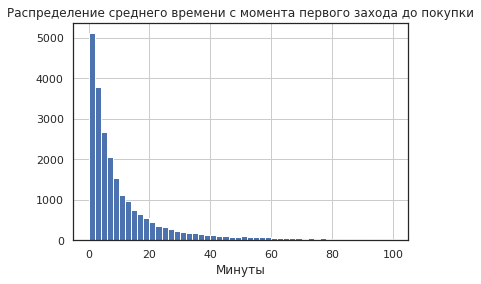

In [48]:
# для описания этого распределения лучше всего подойдет мода
mean_buy_period['time_to_buy'].hist(range=(0, 100), bins=50)

plt.title('Распределение среднего времени с момента первого захода до покупки')
plt.xlabel('Минуты')
plt.show()

In [49]:
# медиана и среднее сильно отличаются от моды. По графику видим, что для описания распределения они не подходят
mean_buy_period['time_to_buy'].describe()

count     36523.000000
mean      24340.175834
std       67784.774690
min           0.000000
25%           4.000000
50%          16.000000
75%        2897.000000
max      523144.000000
Name: time_to_buy, dtype: float64

In [50]:
mean_buy_period['time_to_buy'].mode()

0    1.0
dtype: float64

#### Предварительный вывод

Видим, что распределение далеко от нормального. Поэтому среднее и медиана не годятся для описания центральной тенденции распределения. Для этих целей лучше подойдет мода. Среднее время между первым заходом и покупкой равно 1 минуте. 

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

И снова минута. Тенденция не радует. 
    
    
Тут тоже можно немного расширить вывод. :)
    

</div>

### 2.2.2  Рассчитаем среднее количество покупок на одного покупателя

In [51]:
orders.head(3)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844


In [52]:
# для каждого uid определяем дату первой покупки
first_orders_date = orders.groupby('uid')['buy_ts'].min()
first_orders_date.name = 'first_orders_date'
first_orders_date.head(3)

uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
Name: first_orders_date, dtype: datetime64[ns]

In [53]:
# в orders добавляем дату первой покупки
orders = orders.join(first_orders_date, on='uid')

In [54]:
# определяем месц в который были совершены покупки, а также месяц в который была совершена первая покупка
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['first_order_month'] = orders['first_orders_date'].astype('datetime64[M]')
orders.head(3)

,buy_ts,revenue,uid,first_orders_date,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01


In [55]:
# формируем когорты по дате порвого заказа, считаем число заказов и пользователей по каждому месяцу в когортах
orders_grouped_by_cohorts = orders.groupby(['first_order_month', 'order_month']).agg({'uid': ['count', 'nunique']}).reset_index()
orders_grouped_by_cohorts.columns = ['first_order_month', 'order_month', 'n_orders', 'n_users']
orders_grouped_by_cohorts.head(3)

,first_order_month,order_month,n_orders,n_users
0,2017-06-01,2017-06-01,2354,2023
1,2017-06-01,2017-07-01,177,61
2,2017-06-01,2017-08-01,174,50


In [56]:
# Найдём lifetime когорты. Из месяца совершения заказа order_month вычтем месяц когорты first_order_month:
orders_grouped_by_cohorts['cohort_lifetime'] = (orders_grouped_by_cohorts['order_month'] - orders_grouped_by_cohorts['first_order_month'])
orders_grouped_by_cohorts['cohort_lifetime'] = (orders_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1, 'M')).round().astype('int')
orders_grouped_by_cohorts.head(3)

,first_order_month,order_month,n_orders,n_users,cohort_lifetime
0,2017-06-01,2017-06-01,2354,2023,0
1,2017-06-01,2017-07-01,177,61,1
2,2017-06-01,2017-08-01,174,50,2


In [57]:
# Оставим в данных о месяце первого заказа только год и месяц:
orders_grouped_by_cohorts['first_order_month'] = orders_grouped_by_cohorts['first_order_month'].dt.strftime('%Y-%m') 

In [58]:
# столбец со средним числом заказов на пользователя
orders_grouped_by_cohorts['orders_per_user'] = orders_grouped_by_cohorts['n_orders'] / orders_grouped_by_cohorts['n_users']

#### Построим сводную таблицу и создадим тепловую карту со средним числом заказов на пользователя по когортам

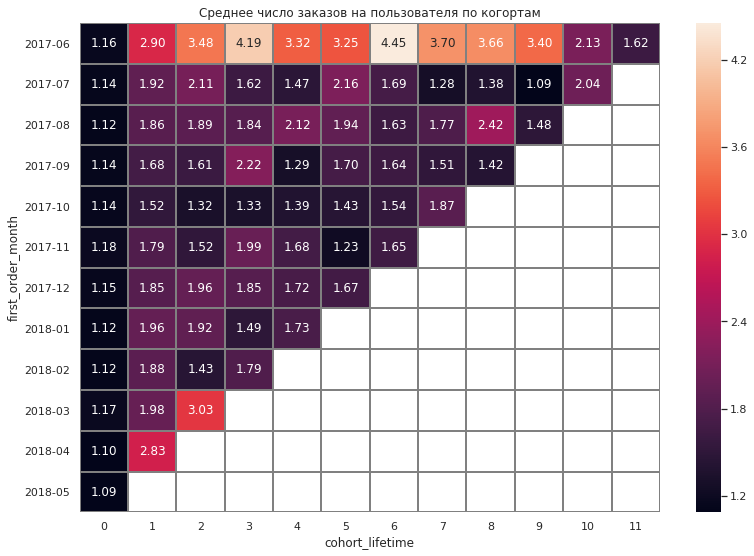

In [59]:
orders_per_user = orders_grouped_by_cohorts.pivot_table(index='first_order_month', columns='cohort_lifetime', values='orders_per_user', aggfunc='mean')


sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Среднее число заказов на пользователя по когортам')
sns.heatmap(orders_per_user[:-1], annot=True, fmt='.2f', linewidths=1, linecolor='gray')

plt.show()

#### Предварительный вывод

In [60]:
orders_per_user.reset_index(inplace=True)
print('Cреднее количество покупок на одного покупателя за 6 месяцев {}'.format(orders_per_user[5].mean().round(1)))

Cреднее количество покупок на одного покупателя за 6 месяцев 1.9


In [61]:
mean_orders = orders.groupby('order_month').agg({'revenue': 'count'})[:-1].mean()
print('Среднее число покупок в месяц', mean_orders[0].round(0).astype('int'))

Среднее число покупок в месяц 4201


<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Молодец, что указал среднее количество за 6 месяцев, так у нас почти 2 заказа от покупателя. Выглядит лучше, чем один. :) Среднее число покупок радует больше!

</div>

###  Рассчитаем средний чек

In [62]:
orders.head(3)

,buy_ts,revenue,uid,first_orders_date,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01


In [63]:
# считаем число заказов и сумму по всем заказам по месяцам
df = orders.groupby('order_month').agg({'revenue': ['count', 'sum']})
df = df[:-1].reset_index() #удаляем последнюю строчку в df, потому что это информация за следующий период
df.columns = ['order_month', 'n_orders', 'income']
df['average_check'] = df['income'] / df['n_orders'] # средний чек
df['order_month'] = df['order_month'].dt.strftime('%Y-%m') 
df.head(3)

,order_month,n_orders,income,average_check
0,2017-06,2354,9557.49,4.060106
1,2017-07,2363,12539.47,5.306589
2,2017-08,1807,8758.78,4.847139


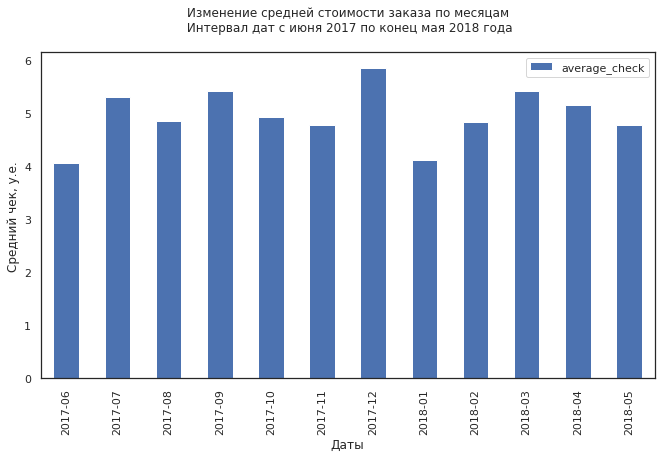

In [64]:
df.plot(kind='bar', x='order_month', y='average_check', figsize=(11,6))

plt.title('Изменение средней стоимости заказа по месяцам'+ "\n Интервал дат с июня 2017 по конец мая 2018 года" + "\n")
plt.xlabel('Даты')
plt.ylabel('Средний чек, у.е.')
plt.show()

In [65]:
total_income = df['income'].sum()
number_orders = df['n_orders'].sum()
average_order = total_income / number_orders
print('Средняя стоимость заказа за весь период {:.2f} условных единиц'.format(average_order))

Средняя стоимость заказа за весь период 5.00 условных единиц


<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Кажется, это не очень много, что-то у нас не ладно с Афишей.

</div>

### Рассчитаем как меняется LTV на покупателя по когортам

In [66]:
orders.head(3)

,buy_ts,revenue,uid,first_orders_date,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01


In [67]:
# Сопоставляем каждому uid месяц первой покупки
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head(3)

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01


In [68]:
# Определяем размер когорт
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head(3)

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370


In [69]:
orders.head(3)

,buy_ts,revenue,uid,first_orders_date,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01


In [70]:
cohorts = (
    orders.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
cohorts.head(3)

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34


In [71]:
report = pd.merge(cohorts, cohort_sizes, on='first_order_month')
report.head(3)

,first_order_month,order_month,revenue,n_buyers
0,2017-06-01,2017-06-01,9557.49,2023
1,2017-06-01,2017-07-01,981.82,2023
2,2017-06-01,2017-08-01,885.34,2023


LTV считают из валовой прибыли. Умножим выручку на маржинальность.Так как LTV относительный показатель, то его удобнее смотреть по «возрастным» когортам, где в столбцах будет возраст когорты.

In [72]:

report['gp'] = report['revenue'] * MARGIN_RATE
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report.head()

,first_order_month,order_month,revenue,n_buyers,gp,age
0,2017-06-01,2017-06-01,9557.49,2023,9557.49,0
1,2017-06-01,2017-07-01,981.82,2023,981.82,1
2,2017-06-01,2017-08-01,885.34,2023,885.34,2
3,2017-06-01,2017-09-01,1931.30,2023,1931.30,3
4,2017-06-01,2017-10-01,2068.58,2023,2068.58,4


In [73]:
report['ltv'] = report['gp'] / report['n_buyers']
report.head()

,first_order_month,order_month,revenue,n_buyers,gp,age,ltv
0,2017-06-01,2017-06-01,9557.49,2023,9557.49,0,4.724414
1,2017-06-01,2017-07-01,981.82,2023,981.82,1,0.485329
2,2017-06-01,2017-08-01,885.34,2023,885.34,2,0.437637
3,2017-06-01,2017-09-01,1931.30,2023,1931.30,3,0.954671
4,2017-06-01,2017-10-01,2068.58,2023,2068.58,4,1.022531


In [74]:

#report['first_order_month_graph'] = report['first_order_month'].dt.strftime('%Y-%m')
output = report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').round(2)
output = output.loc['2017-06-01':'2017-12-01']
output

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,NaN
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,NaN,NaN
2017-09-01,5.64,1.12,0.52,3.98,0.40,0.65,0.70,0.24,0.18,NaN,NaN,NaN
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,NaN,NaN,NaN,NaN
2017-11-01,5.15,0.40,0.20,0.32,0.15,0.05,0.11,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# Ради интереса посчитаем итоговый LTV первой когорты. Сложим LTV по месяцам
cohort_201803 = report.loc[report['first_order_month'] == '2017-06-01']
cohort_201803.head(3)

,first_order_month,order_month,revenue,n_buyers,gp,age,ltv
0,2017-06-01,2017-06-01,9557.49,2023,9557.49,0,4.724414
1,2017-06-01,2017-07-01,981.82,2023,981.82,1,0.485329
2,2017-06-01,2017-08-01,885.34,2023,885.34,2,0.437637


In [76]:
ltv_201706 = output.loc['2017-06-01'].sum()
print('В среднем каждый покупатель первой когорты принес по {} у.е. валовой прибыли за 12 месяцев'.format(ltv_201706))

В среднем каждый покупатель первой когорты принес по 11.88 у.е. валовой прибыли за 12 месяцев


In [77]:
# посчитаем CAC этой когорты. Поделим расходы за этот месяц, на количество людей в когорте
costs['month'] = costs['dt'].astype('datetime64[M]')
costs_201706 = costs.query('month == "2017-06-01"')['costs'].sum()

n_buyers_201706 = cohort_201803['n_buyers'][0]
cac_201706 = costs_201706 / n_buyers_201706

print('CAC =', cac_201706.round(2))
print('LTV =', ltv_201706)

CAC = 8.91
LTV = 11.88


Привлечение одного покупателя в среднем обошлось компании в 8.91 у.е. Валовая прибыль с каждого из них: 11.88 у.е. То есть вложения в привлечение покупателей окупились.

#### Рассчитаем LTV

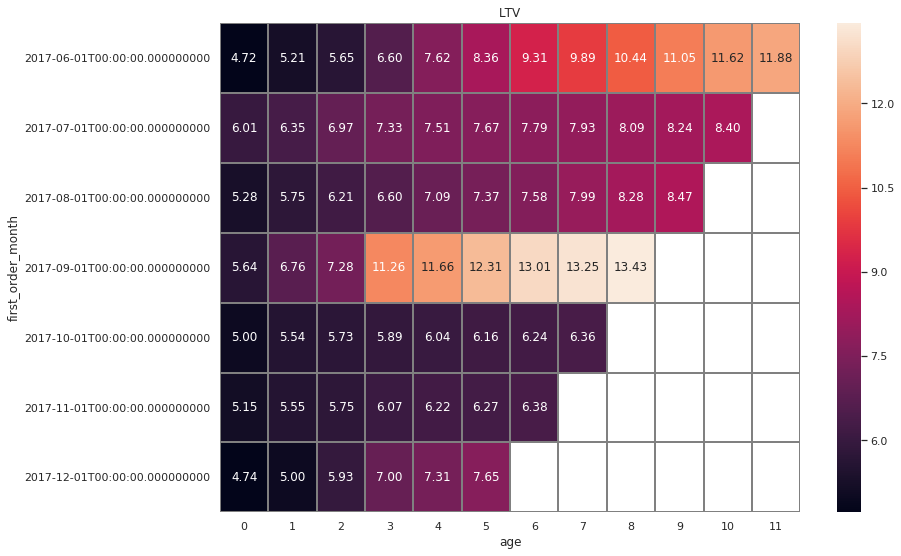

In [78]:
output = output.cumsum(axis=1)

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray')

plt.show()

In [79]:
mean_ltv_6 = output.reset_index()[5].mean().round(2)
print('Cредний LTV по когортам за 6 месяцев {} у.е.'.format(mean_ltv_6))

Cредний LTV по когортам за 6 месяцев 7.97 у.е.


#### Для наглядности давайте рассчитаем ROMI по всем каналам

Посмотрим, сколько месяцев нужно каждой когорте, чтобы окупить маркетинговые затраты.

In [80]:
monthly_costs = costs.groupby('month').agg({'costs': 'sum'})
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new['romi'] = report_new['ltv'] / report_new['cac']

output_new = report_new.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
)


output_new.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,NaN
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.70,0.74,0.77,0.78,NaN,NaN
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.30,1.38,1.40,1.42,NaN,NaN,NaN
2017-10-01,0.60,0.66,0.68,0.70,0.72,0.74,0.75,0.76,NaN,NaN,NaN,NaN
2017-11-01,0.55,0.60,0.62,0.65,0.67,0.68,0.69,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.54,0.57,0.68,0.80,0.84,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.42,0.45,0.48,0.49,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.46,0.49,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Предварительный вывод

* Июньская когорта окупилась на 7 месяц (ROMI = 1.05)
* Июльская когорта пока не окупилась. ROMI на 11 месяц равен 0.88
* Сентябрьская когорта окупиалсь на 4 месяц (ROMI = 1.19)
* Остальные когорты пока не окупились

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Отлично! LTV рассчитан верно. Когорты в большинстве не радуют, конечно.
    
Прекрасные дополнительные рассчеты для ROMI. К ним очень просится heatmap. :)

</div>

## 2.3 Маркетинговые метрики

### 2.3.1 Посчитаем общую сумму расходов на маркетинг. Выясним распределение трат по источникам

#### Общая сумма затрат на маркетинг

In [81]:
costs.head(3)

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01


In [82]:
print('Общая сумма затрат на маркетинг составляет {} у.е.'.format(costs['costs'].sum().round()))

Общая сумма затрат на маркетинг составляет 329132.0 у.е.


In [83]:
print('Общая выручка по всем заказам {} у.е.'.format(orders['revenue'].sum().round()))

Общая выручка по всем заказам 252057.0 у.е.


<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Не очень хорошо выходит по затратам. Надо что-то менять!

</div>

In [84]:
# приводим столбец dt в формат даты
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d')

#### Распределение трат по источникам

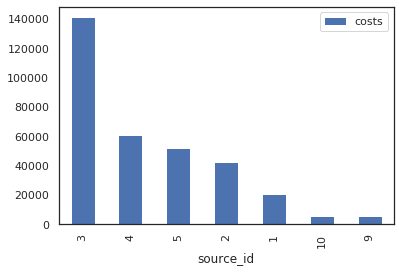

In [85]:
costs.groupby('source_id').agg({'costs': 'sum'}).sort_values('costs', ascending=False).plot(kind='bar')

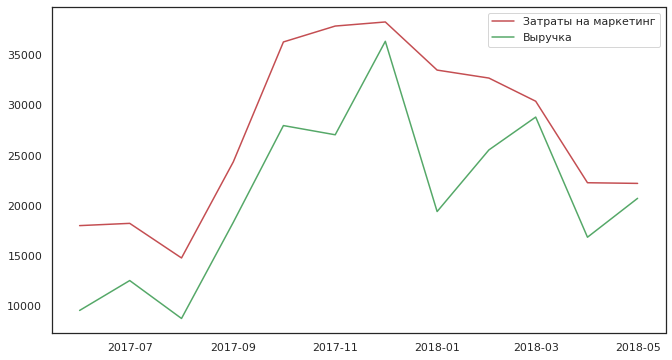

In [86]:
# Ежемесячные затраты на маркетинг
monthly_costs = costs.groupby('month').agg({'costs': 'sum'}).reset_index()

# Ежемесячная выручка
monthly_revenue = orders.groupby('order_month').agg({'revenue': 'sum'})[:-1]

# Объединяем таблицы затрат и выручки в единую таблицу
revenue_and_costs = pd.merge(monthly_costs, monthly_revenue, left_on='month', right_on='order_month')
revenue_and_costs.head()

x = revenue_and_costs['month']
y = revenue_and_costs['costs']
z = revenue_and_costs['revenue']

plt.figure(figsize=(11, 6))

plt.plot(x, y, color='r', label='Затраты на маркетинг')
plt.plot(x, z, color='g', label='Выручка')

plt.legend()

plt.show()

* Затраты на маркетинг превышают выручку на всем периоде наблюдений. Это не хорошо.
* Выручка приблизилась к затратам в декабре и марте, по-видимому это связано с тем, что в праздники клиенты больше покупали
* В январе заметный спад. Это в первую очередь связано с тем, что январь сам по себе плохой месяц для продаж. Но возможно это связано с тем, что маркетологи снизили затраты на маркетинг в январе. Можно предположить, что это было их ошибкой.

In [87]:
costs.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum')

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


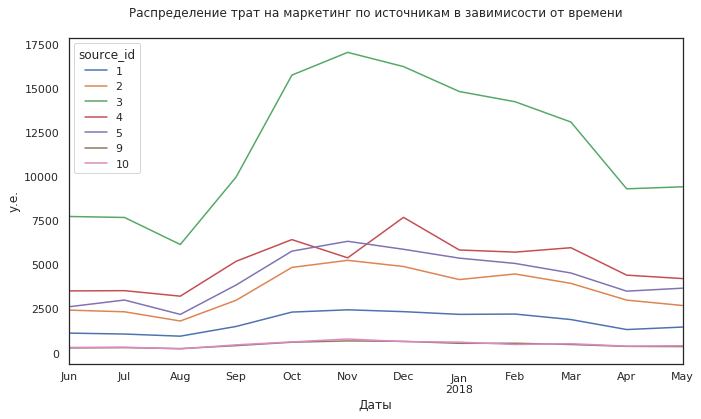

In [88]:
costs.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum').plot(figsize=(11, 6))

plt.title("Распределение трат на маркетинг по источникам в завимисости от времени" + "\n")
plt.xlabel('Даты')
plt.ylabel('у.е.')
plt.show()

* Больше всего затрат на источник №3. Хотя дальше выяснится, что третий источник далеко не самый выгодный для привлечения клиентов.
* Заметный рост трат на третий источник в августе. По остальным источникам такого быстрого роста не наблюдается. Маркетологам надо было уточнить на каком канале самая низкая стоимость привлечения клиента. И уже от этой информации отталкиваться. 
* Максимальные траты на маркетинг были в ноябре и декабре

<div class="alert alert-block alert-warning">
<b>Комментарий от ревьюера</b>

Тут хотелось бы выводов к каждому графику, они выглядят сиротливо без комментариев.

</div>

<div class="alert alert-block alert-success">
<b>Done</b>

Добавил комментарии к обоим графикам

</div>

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера. V.2.</b>

Отлично!
</div>

### 2.3.2. Рассчитаем средний CAC

In [89]:
costs.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [90]:
# считаем расходы за месяц 

monthly_costs = costs.groupby('month').agg({'costs': 'sum'}).reset_index()
monthly_costs.head(3)

,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54


#### Рассчитаем средний CAC на одного покупателя по всем каналам

In [91]:
# добавляем в report данные по месячным тратам на маркетинг

report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
mean_cac = report_new.groupby('first_order_month').agg({'cac': 'mean'}).mean()
print('Cредний CAC на одного покупателя для всего проекта {} у.е'.format(mean_cac[0].round(2)))

Cредний CAC на одного покупателя для всего проекта 9.15 у.е


In [92]:
report_new.head()

,first_order_month,order_month,revenue,n_buyers,gp,age,ltv,month,costs,cac
0,2017-06-01,2017-06-01,9557.49,2023,9557.49,0,4.724414,2017-06-01,18015.0,8.905091
1,2017-06-01,2017-07-01,981.82,2023,981.82,1,0.485329,2017-06-01,18015.0,8.905091
2,2017-06-01,2017-08-01,885.34,2023,885.34,2,0.437637,2017-06-01,18015.0,8.905091
3,2017-06-01,2017-09-01,1931.30,2023,1931.30,3,0.954671,2017-06-01,18015.0,8.905091
4,2017-06-01,2017-10-01,2068.58,2023,2068.58,4,1.022531,2017-06-01,18015.0,8.905091


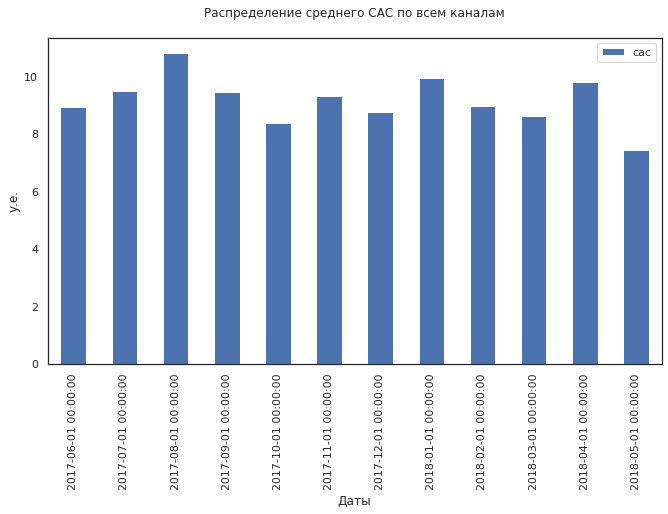

In [93]:
report_new.groupby('first_order_month').agg({'cac': 'mean'}).plot(figsize=(11, 6), kind='bar')

plt.title("Распределение среднего CAC по всем каналам" + "\n")
plt.xlabel('Даты')
plt.ylabel('у.е.')
plt.show()

In [94]:
# определяем главный источник траффика
visits['start_day'] = visits['start_ts'].astype('datetime64[D]')
source = visits.sort_values('start_day').groupby('uid').first().reset_index()
source.head(3)

,uid,device,end_ts,source_id,start_ts,session_year,session_month,session_week,session_date,first_activity_date,first_activity_month,start_ts_month,lifetime_cohort,start_day
0,11863502262781,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018,3,9,2018-03-01,2018-03-01 17:27:00,2018-03-01,2018-03-01,0,2018-03-01
1,49537067089222,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018,2,6,2018-02-06,2018-02-06 15:55:00,2018-02-01,2018-02-01,0,2018-02-06
2,297729379853735,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017,6,23,2017-06-07,2017-06-07 18:47:00,2017-06-01,2017-06-01,0,2017-06-07


In [95]:
# опредляем дату первой покупки
first_order = orders.groupby(['uid']).agg({'buy_ts': 'min'}).reset_index()
first_order.columns = ['uid', 'first_order_date']
first_order.head(3)

,uid,first_order_date
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00


In [96]:
# смотрим пересечение двух таблиц, тем самым определяем кто из поситителей стал покупателем
# объединим таблицы first_order и source. В результате сопоставим uid совершивших покупку и день первой покупки
orders_source = pd.merge(first_order, source, on='uid', how='inner')
orders_source.head()


,uid,first_order_date,device,end_ts,source_id,start_ts,session_year,session_month,session_week,session_date,first_activity_date,first_activity_month,start_ts_month,lifetime_cohort,start_day
0,313578113262317,2018-01-03 21:51:00,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017,9,38,2017-09-18,2017-09-18 22:49:00,2017-09-01,2017-09-01,0,2017-09-18
1,1575281904278712,2017-06-03 10:13:00,touch,2017-06-03 17:48:00,10,2017-06-03 17:36:00,2017,6,22,2017-06-03,2017-06-03 10:13:00,2017-06-01,2017-06-01,0,2017-06-03
2,2429014661409475,2017-10-11 18:33:00,desktop,2017-10-11 17:27:00,3,2017-10-11 17:14:00,2017,10,41,2017-10-11,2017-10-11 17:14:00,2017-10-01,2017-10-01,0,2017-10-11
3,2464366381792757,2018-01-28 15:54:00,desktop,2018-01-27 20:13:00,5,2018-01-27 20:10:00,2018,1,4,2018-01-27,2018-01-27 20:10:00,2018-01-01,2018-01-01,0,2018-01-27
4,2551852515556206,2017-11-24 10:14:00,desktop,2017-11-24 11:31:00,5,2017-11-24 11:22:00,2017,11,47,2017-11-24,2017-11-24 10:14:00,2017-11-01,2017-11-01,0,2017-11-24


In [97]:
# определяем число заказов по источникам и дням
group_source = orders_source.groupby(['source_id', 'start_day']).agg({'uid': 'count'}).reset_index()
group_source.columns = ['source_id', 'start_day', 'n_buyers']
group_source.head()


,source_id,start_day,n_buyers
0,1,2017-06-01,28
1,1,2017-06-02,13
2,1,2017-06-03,8
3,1,2017-06-04,7
4,1,2017-06-05,22


#### Рассчитаем средний CAC на одного покупателя для каждого источника трафика

In [98]:
# объединяем таблицы по двум колонкам
costs_by_source = pd.merge(group_source, costs, left_on=['source_id', 'start_day'], right_on=['source_id', 'dt'])
costs_by_source['cac'] = costs_by_source['costs'] / costs_by_source['n_buyers']
costs_by_source['month'] = costs_by_source['month'].dt.strftime('%Y-%m')

pivot_costs_by_source = costs_by_source.pivot_table(index='month', columns='source_id', values='cac', aggfunc='mean', margins=True)

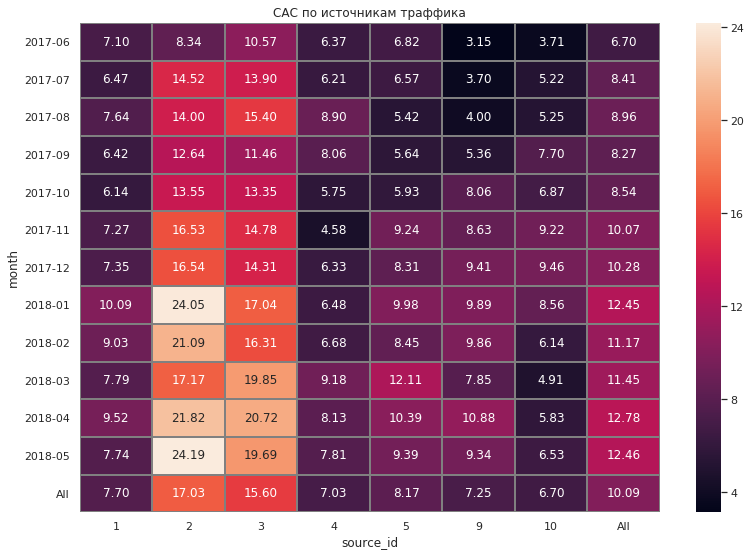

In [99]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.xlabel('Возраст когорты, месяцев')
plt.ylabel('Когорта')
plt.title('CAC по источникам траффика')


sns.heatmap(pivot_costs_by_source, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.show()

* Самая высокая стоимость привлечения клиента в каналах 2 и 3. Маректологам стоит сменить фокус с третьего рекламного канала на другие.
* Самая низкая стоимость привлечения в 10, 9, 4 и 1 каналах. На них стоит сместить фокус

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Супер! С САС получилось рассчитать всё верно.

</div>


<div class="alert alert-block alert-warning">
<b>Комментарий от ревьюера</b>

Но где же выводы?

</div>

<div class="alert alert-block alert-success">
<b>Done</b>

Добавил вывод

</div>

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера. V.2.</b>

Ура!
</div>

###  Рассчитаем ROMI по когортам в разрезе источников

In [100]:
# определяем день покупки, понадобится при объединении таблиц c затратами и выручкой

orders['day'] = orders['buy_ts'].astype('datetime64[D]')

In [101]:
# в таблице source сопоставлен uid и source_id первого захода на сайт

source = source[['uid', 'source_id']]
source.head(3)

,uid,source_id
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3


In [102]:
# Объединнили source и orders в общую таблицу по uid. 
# Теперь в orders есть данные по каналу по которому пришел клиент и выручке

orders_source = pd.merge(source, orders, on='uid', how='inner')

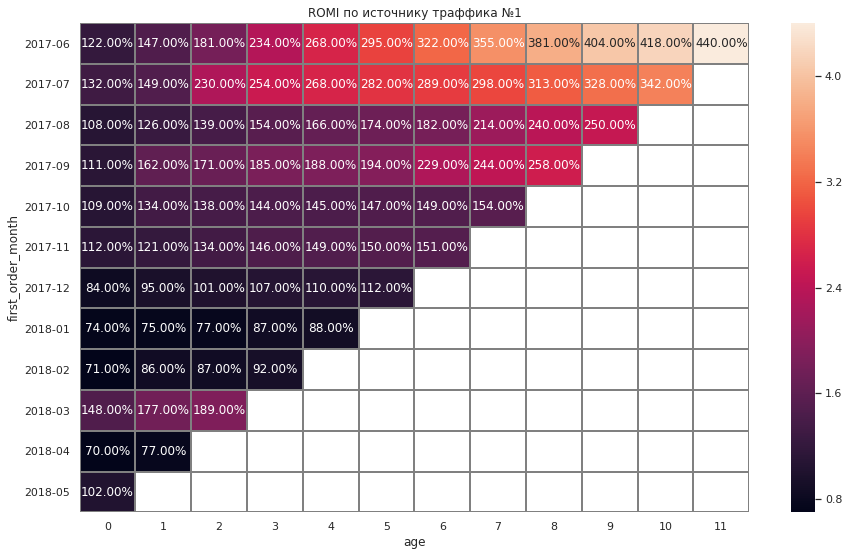

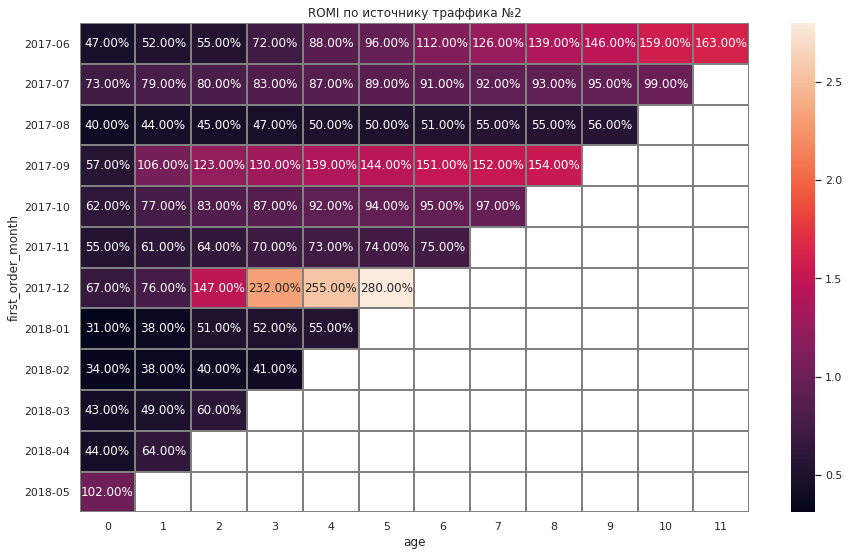

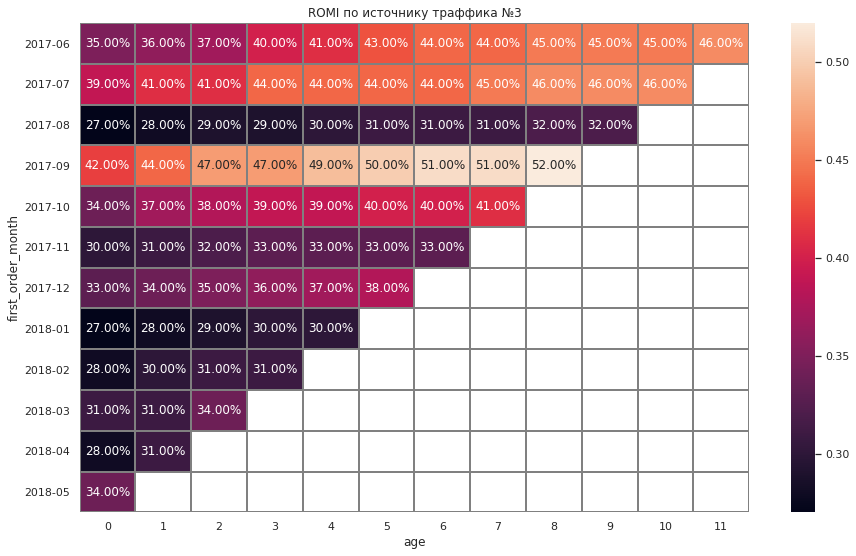

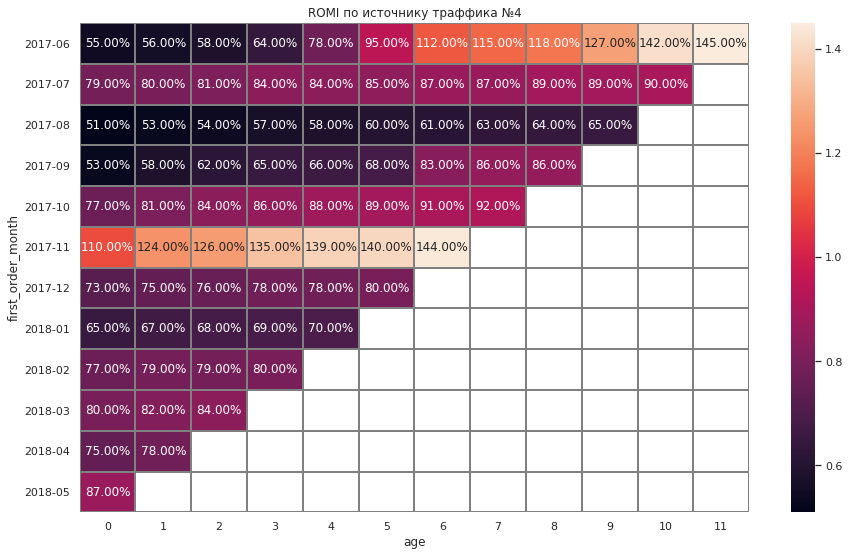

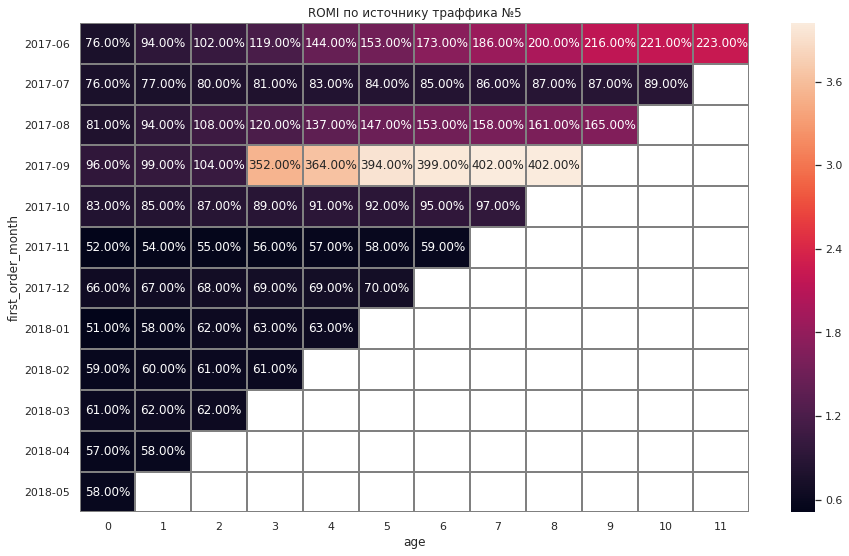

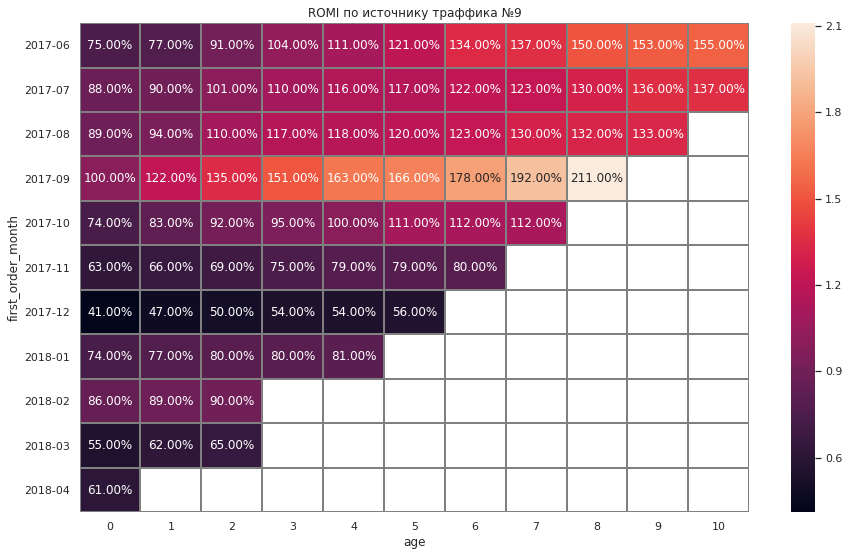

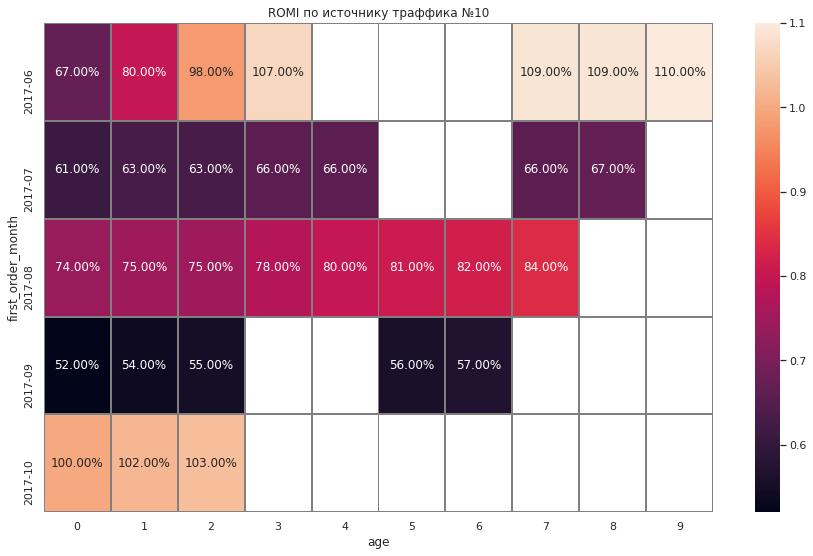

In [103]:
# Начианем рассчитывать LTV, CAC, ROMI для канала №1


for i in [ 1,  2,  3,  4,  5,  9, 10]:#sorted(orders_source['source_id'].unique()):
    orders_source_i = orders_source.query('source_id == @i')#loc[orders_source['source_id'] == 1]
    
    # выясним количество новых покупателей за каждый месяц
    cohort_size_i = orders_source_i.groupby(['first_order_month']).agg({'uid': 'count'}).reset_index()
    cohort_size_i.columns = ['first_order_month', 'n_buyers']
    
    # суммируем выручку по месяцу первой покупки и месяцу каждого заказа
    cohorts_i = orders_source_i.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()
    
    # LTV это накопительная выручка когорты в пересчете на количество людей. Поэтому необходимо добавить информацию
    # о количестве людей в каждой когорте
    report_cohort_i = pd.merge(cohorts_i, cohort_size_i, on='first_order_month')
    
    # определяем возраст когорт
    report_cohort_i['age'] = (report_cohort_i['order_month'] - report_cohort_i['first_order_month']) / np.timedelta64(1, 'M')
    report_cohort_i['age'] = report_cohort_i['age'].round().astype('int')
    
    # рассчитываем LTV
    report_cohort_i['ltv'] = report_cohort_i['revenue'] / report_cohort_i['n_buyers']
    
    # расчитываем затраты по месяцам + выборка по источнику траффика
    costs_i = costs.query('source_id == @i').groupby('month').agg({'costs': 'sum'}).reset_index()
    
    final = pd.merge(costs_i, report_cohort_i, left_on='month', right_on='first_order_month')
    final['cac'] = final['costs'] / final['n_buyers']
    final['romi'] = final['ltv'] / final['cac']
    final['first_order_month'] = cohorts['first_order_month'].dt.strftime('%Y-%m')
    
    data = final.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')
    
    # строим тепловую карту
    sns.set(style='white')
    plt.figure(figsize=(15, 9))
    plt.title('ROMI по источнику траффика №' + str(i))
    plt.xlabel('Возраст когорты, месяцев')
    plt.ylabel('Когорта')
    sns.heatmap(data.cumsum(axis=1).round(2), annot=True, fmt='.2%', linewidths=1, linecolor='gray')
    



* №1 самый лучший рекламный канал. Многие когорты окупаются в первый месяц
* №3 самый худший рекламный канал. За 12 месяцев ни одна когорта не окупилась. Не окупилась даже декабрьская когорта
* В четвертом рекламном канале стоит обратить на ноябрьскую когорту. Она окупилась в первый месяц
* В пятом рекламном канале стоит обратить внимание на сентябрьскую когорту. На 8 месяц жизни она окупилась 4 раза
* Обратить внимание на рекламный канал №9. Канал показывал хорошие результаты до октябрьской когорты, однако, затем результаты ухудшились. Например, декабрьская когорта не окупилась, хотя казалось бы при таких результатах должна была. 

#### Рассчитаем среднее LTV. А также CAC и ROMI для каждого источника

In [104]:
# рассчитаем на какой канал привлечения тратится больше всего денег
df1 = costs.groupby('source_id').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False).reset_index()
df1.head(3)

,source_id,costs
0,3,141321.63
1,4,61073.60
2,5,51757.10


In [105]:
# рассчитаем количество покупателей в каждом канале

df2 = source.groupby('source_id').agg({'uid': 'count'}).reset_index()
df2.columns = ['source_id', 'n_buyers']

# для рассчета cac объединим информацию по затратам и количеству покупателей в каждом канале
df3 = pd.merge(df1, df2, on='source_id')
df3.head()

,source_id,costs,n_buyers
0,3,141321.63,65237
1,4,61073.60,71728
2,5,51757.10,49539
3,2,42806.04,17729
4,1,20833.27,10667


In [106]:
# рассчитаем CAC

df3['cac'] = df3['costs'] / df3['n_buyers']

# Далее рассчитываем LTV. Для этого нужно посчитать валовый доход. Умножаем выручку на "маржу"
orders_source['gp'] = orders_source['revenue'] * MARGIN_RATE

# считаем выручку по каждому каналу
df4 = orders_source.groupby('source_id').agg({'gp': 'sum'}).reset_index()

# объединяем таблицы и рассчитваем LTV и ROMI
df5 = pd.merge(df3, df4, on='source_id')
df5['ltv'] = df5['gp'] / df5['n_buyers']
df5['romi'] = df5['ltv'] / df5['cac']
df5 = df5[['source_id', 'cac', 'ltv', 'romi']]

# рассчитаем на какой канал привлечения тратится больше всего средств и объединим в финальную таблицу
df6 = costs.groupby('source_id').agg({'costs': 'sum'})
df7 = pd.merge(df6, df5, on='source_id')
df7 = df7.sort_values('costs', ascending=False)
df7 = df7.set_index('source_id')
df7

,costs,cac,ltv,romi
source_id,,,,
3,141321.63,2.166280,0.796451,0.367658
4,61073.60,0.851461,0.772187,0.906896
5,51757.10,1.044775,1.098975,1.051878
2,42806.04,2.414464,2.557163,1.059102
1,20833.27,1.953058,3.262142,1.670274
10,5822.49,0.848636,0.669969,0.789466
9,5517.49,0.865624,0.868921,1.003808


* Больше всего тратят на рекламу в третьем канале. Но средний ROMI за весь период всего 0.37
* Самый высокий ROMI у канала №1. Однако, он 5 по количеству затрат.
* Рекомендуем маркетологам значительно снизить траты на продвижение в тертьем канале и обратить внимамние на канал №1
* Провести тесты с рекламой в каналах 4, 5, 9, 10

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Ты молодец! Этот раздел с ROMI самый запутанный, но ты очень хорошо с ним справился! Выводы нас совсем не радуют, надо точно всё менять.

</div>

<div class="alert alert-block alert-danger">
<b>Комментарий от ревьюера</b>

~У нас есть коварный пункт "Обратите внимание, что клиенты, пришедшие из разных источников, могут иметь разный LTV.". Давай добавим LTV для каждого source_id? Можно в виде последней таблицы для рассчета трат.~
</div>

<div class="alert alert-block alert-success">
<b>Done</b>

Рассчитал средний LTV, CAC и ROMI. Добавил выводы.

</div>

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера. V.2.</b>

Отлично! Тееперь мы видим все изменения этих показателей. Можнобыло еще добавить график, но это уже не так важно. :)
</div>

### Вывод

#### Продуктовые метрики
* Средние значения DAU = 907, MAU = 5716, WAU = 23228
* Недельная вовлеченность аудитории равна 16%. Но так как данных у нас достаточно много, то лучше использовать месячный показатель Sticky Factor. Месячный Sticky Factor равен 4%. Это говорит о том, что у сервиса слабая вовлеченность аудитории. Что может влиять на монетизацию и доход. Так как чем стабильнее и заинтересованнее пользовательская база, тем быстрее формируется и растет аудитория продукта. А чем она больше, тем больше платежей совершают пользователи. В нашем случае надо увеличивать месячный показатель вовлеченности
* В среднем ежедневное количество сессий равно 987. Один пользльователь в среднем совершает 1.09 сессий. 
* Продолжительность типичной пользовательской сессии равна 60 секундам
* Был рассчитан Retention Rate по когортам. Стало понятно, что более 90% пользователей перестают пользоваться сервисом после первого месяца жизни
* Средний Retention Rate на второй месяц жизни когорт равен 6.52%

#### Метрики электронной коммерции
* Среднее время между первым заходом и покупкой равно 1 минуте
* Cреднее количество покупок на одного покупателя за 6 месяцев 1.9
* Средняя стоимость заказа за весь период 5.00 у.е.
* Cредний LTV по когортам за 6 месяцев 7.97 у.е.

#### Маркетинговые метрики
* Общая сумма затрат на маркетинг составляет 329132.0 у.е. Общая выручка по всем заказам 252057.0 у.е. Затраты на маркетинг превышают выручку. Больше всего трат на источник №3.
* Cредний CAC на одного покупателя для всего проекта 9.15 у.е. Также был расчитан средний CAC по каналам. И отражены изменения метрик на графиках
* Самый высокий ROMI у первого канала, однако, он пятый по суммарным затратам на канал продвижения. Третий рекламный канал не окупается вообще, хотя на него тратится больше всего средств

#### Рекомендации
* Обратить внимание на источники траффика: 1, 2, 5, 9
* На источник 3 тратится больше всего срадств, однако, у него самая высокая стоимость





<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Вывод-супер! Всё четко структурировано и подробно описано! Молодец!

</div>